<a href="https://colab.research.google.com/github/shivrajsingh08/Financial-Analysis/blob/main/Shivraj_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required modules
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as m

In [ ]:
# Monthly data of ONGC for 5 years (2019-2024)
ongc = yf.download(
    'ONGC.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
ongc.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS
Date,,,,,,
2019-04-01,118.732323,169.199997,171.149994,153.300003,160.500000,322751617
2019-05-01,120.662079,171.949997,178.899994,160.850006,169.199997,229106692
2019-06-01,117.714828,167.750000,173.500000,162.949997,173.000000,184559027
2019-07-01,97.434906,138.850006,170.399994,136.250000,168.199997,284760847
2019-08-01,85.049400,121.199997,139.750000,115.750000,138.500000,234732187


In [ ]:
#Download Market index closing prices
ongc.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS
Date,,,,,,
2023-11-01,177.157806,194.949997,203.399994,185.050003,186.149994,205294168
2023-12-01,191.913483,205.050003,212.000000,192.050003,195.250000,349347596
2024-01-01,236.089615,252.250000,263.299988,203.649994,206.000000,544958210
2024-02-01,247.648453,264.600006,281.149994,245.449997,254.649994,485799920
2024-03-01,254.549210,268.049988,284.950012,248.899994,266.500000,294818868


# Calculate Log Returns

In [ ]:
# Calculate log returns
ongc['ONGC Monthly returns'] = np.log(
    ongc['Adj Close'] / ongc['Adj Close'].shift(1))
ongc.head()

Price,Adj Close,Close,High,Low,Open,Volume,ONGC Monthly returns
Ticker,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,
Date,,,,,,,
2019-04-01,118.732323,169.199997,171.149994,153.300003,160.500000,322751617,NaN
2019-05-01,120.662079,171.949997,178.899994,160.850006,169.199997,229106692,0.016122
2019-06-01,117.714828,167.750000,173.500000,162.949997,173.000000,184559027,-0.024729
2019-07-01,97.434906,138.850006,170.399994,136.250000,168.199997,284760847,-0.189080
2019-08-01,85.049400,121.199997,139.750000,115.750000,138.500000,234732187,-0.135952


<Axes: xlabel='Date'>

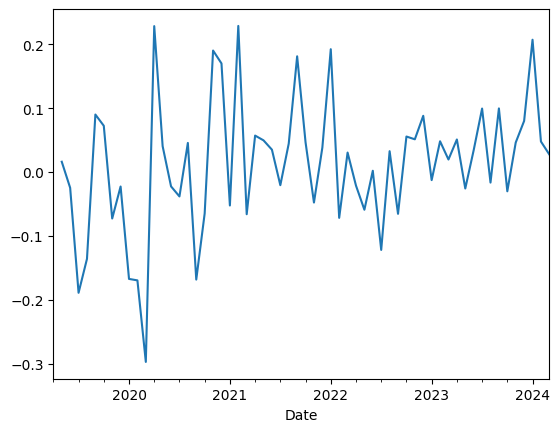

In [ ]:
# Plotting ONGC monthly returns
ongc['ONGC Monthly returns'].plot()

<Axes: xlabel='Date'>

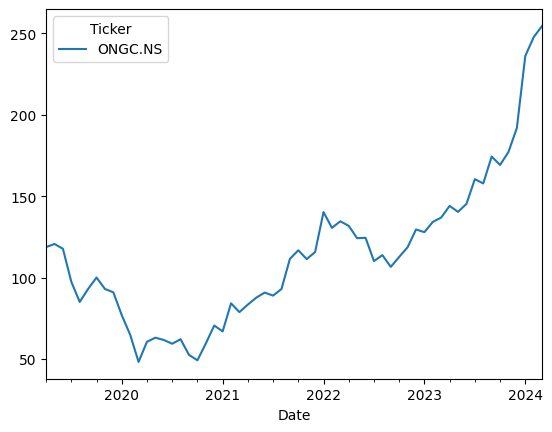

In [ ]:
# ploting ONGC closing prices
ongc['Adj Close'].plot()

# Market Monthly Returns

In [ ]:
# Downloading Nifty 50 (market index) data
nifty = yf.download(
    '^NSEI',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
nifty.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2019-04-01,11748.150391,11748.150391,11856.150391,11549.099609,11665.200195,6516900
2019-05-01,11922.799805,11922.799805,12041.150391,11108.299805,11725.549805,8645600
2019-06-01,11788.849609,11788.849609,12103.049805,11625.099609,11953.750000,6788000
2019-07-01,11118.000000,11118.000000,11981.750000,10999.400391,11839.900391,9988500
2019-08-01,11023.250000,11023.250000,11181.450195,10637.150391,11060.200195,11153100


In [ ]:
# Finding market returns
nifty['Market returns'] = np.log(
    nifty['Adj Close'] / nifty['Adj Close'].shift(1)
)
nifty.head()

Price,Adj Close,Close,High,Low,Open,Volume,Market returns
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,,
2019-04-01,11748.150391,11748.150391,11856.150391,11549.099609,11665.200195,6516900,NaN
2019-05-01,11922.799805,11922.799805,12041.150391,11108.299805,11725.549805,8645600,0.014757
2019-06-01,11788.849609,11788.849609,12103.049805,11625.099609,11953.750000,6788000,-0.011298
2019-07-01,11118.000000,11118.000000,11981.750000,10999.400391,11839.900391,9988500,-0.058589
2019-08-01,11023.250000,11023.250000,11181.450195,10637.150391,11060.200195,11153100,-0.008559


<Axes: xlabel='Date'>

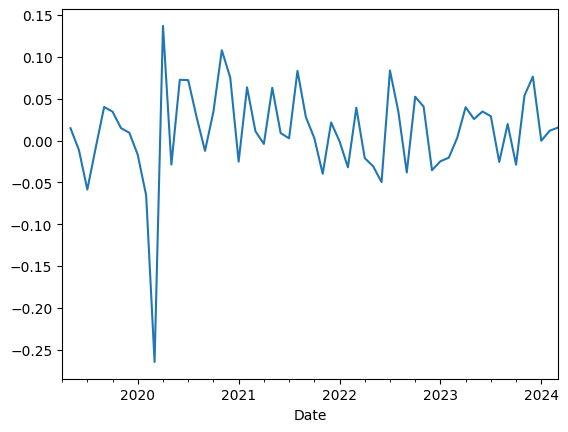

In [ ]:
# ploting market returns
nifty['Market returns'].plot()

<Axes: xlabel='Date'>

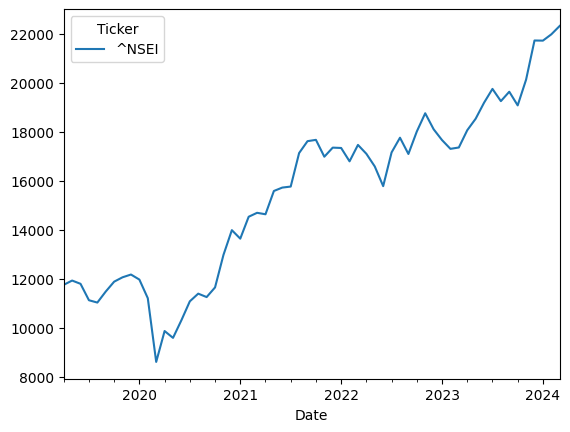

In [ ]:
# ploting market closing prices
nifty['Adj Close'].plot()

# Studying ONGC and Market data

In [ ]:
# merging market and cipla returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    ongc['ONGC Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,ONGC Monthly returns
Date,,
2019-05-01,0.014757,0.016122
2019-06-01,-0.011298,-0.024729
2019-07-01,-0.058589,-0.189080
2019-08-01,-0.008559,-0.135952
2019-09-01,0.040116,0.090051


In [ ]:
# returns summary
returns.describe()

,Market returns,ONGC Monthly returns
count,59.000000,59.000000
mean,0.010883,0.012926
std,0.055823,0.104735
min,-0.264569,-0.297335
25%,-0.020723,-0.042982
50%,0.011765,0.030506
75%,0.039495,0.053429
max,0.136976,0.228790


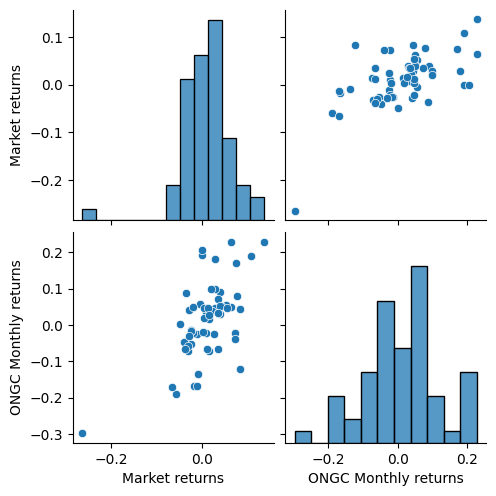

In [ ]:
sns.pairplot(returns)
plt.show()

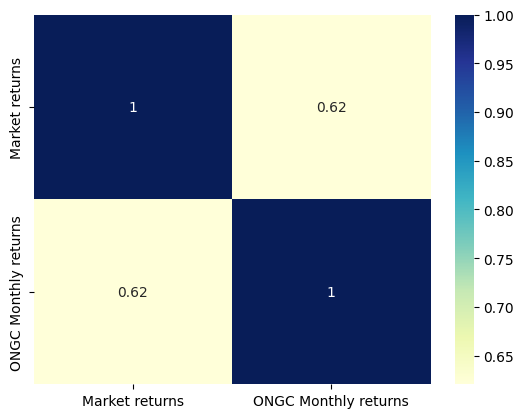

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()

Find Beta of ONGC Using Regression

In [ ]:
X = nifty['Market returns'].dropna()
y = ongc['ONGC Monthly returns'].dropna()
len(X), len(y)

(59, 59)

In [ ]:
X = sm.add_constant(X)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
# Regression - Market model, of ONGC
beta = sm.OLS(y, X).fit()
print(beta.summary())

                             OLS Regression Results                             
Dep. Variable:     ONGC Monthly returns   R-squared:                       0.385
Model:                              OLS   Adj. R-squared:                  0.374
Method:                   Least Squares   F-statistic:                     35.70
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):           1.58e-07
Time:                          13:43:16   Log-Likelihood:                 64.255
No. Observations:                    59   AIC:                            -124.5
Df Residuals:                        57   BIC:                            -120.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.000

Beta for ONGC  = 1.1643

<Axes: xlabel='Market returns', ylabel='ONGC Monthly returns'>

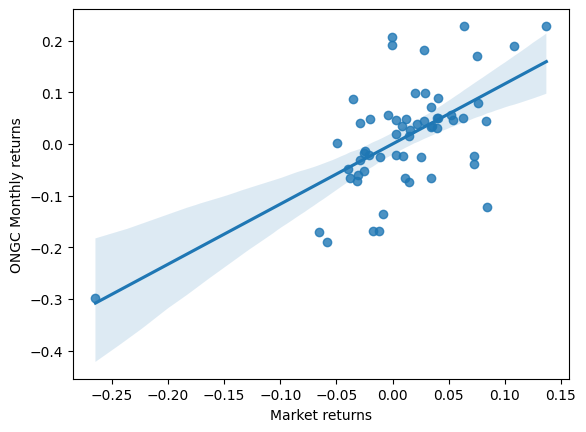

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='ONGC Monthly returns',
    data=returns
)

<ipython-input-19-53f4b954e532>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beta.resid)


,0
count,5.900000e+01
mean,1.311333e-17
std,8.212875e-02
min,-2.196861e-01
25%,-2.886328e-02
50%,2.870925e-03
75%,4.292494e-02
max,2.072174e-01


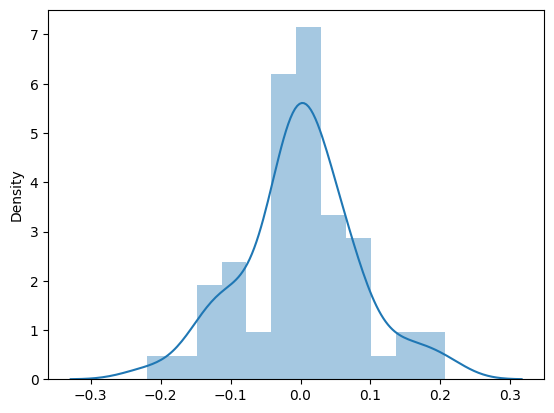

In [ ]:
# Histogram of residuals
sns.distplot(beta.resid)
beta.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(beta.resid, beta.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(0.5444809804339762), 'Test Statistic p-value': np.float64(0.7616710646226368), 'F-Statistic': np.float64(0.2608045862538376), 'F-Test p-value': np.float64(0.7713620345166404)}


Homoskedasticity Holds Here


# Checking for Normality

# Checking for Normality

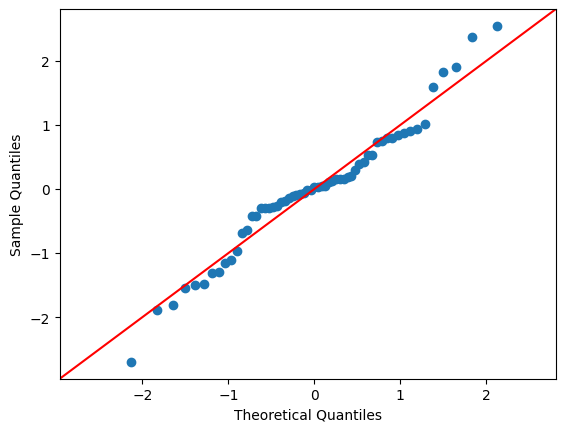

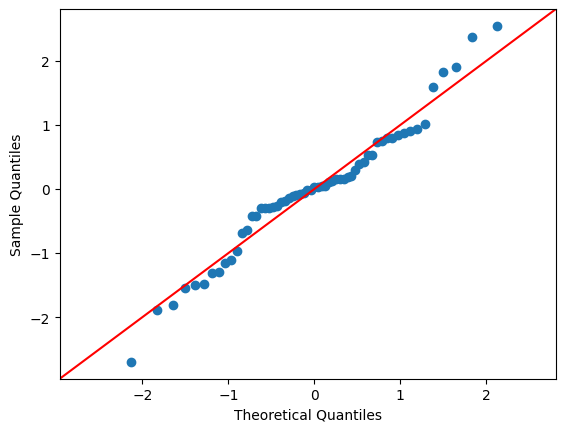

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    beta.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

In [ ]:
stats.normaltest(beta.resid)

NormaltestResult(statistic=np.float64(1.5809386215108618), pvalue=np.float64(0.4536318510110605))

The line isn't exactly straight

# Cost Of Equity Capital

Risk Free Rate  = 5.180%
Source: http://www.epwrfits.in/TreeViewSecurity.aspx

In [ ]:
beta_ongc = beta.params['Market returns']
R_f = 0.05180
nifty_monthlyreturn= nifty['Market returns'].dropna().mean()
annualizedreturn= m.pow((1+nifty_monthlyreturn), 12)-1
R_m = annualizedreturn
print(beta_ongc, R_f, R_m)

1.1642878510910388 0.0518 0.13870353114035128


In [ ]:
# finding cost of equity using CAPM
R_e_top_down_approach = R_f + (beta_ongc *(R_m-R_f))
R_e_top_down_approach

np.float64(0.1529807466704368)

# Cost Of Equity Capital- Bottom Up Approach

## Finding beta of competitive fi rms using regression

### BPCL

In [ ]:
# downloading BPCL data
bpcl = yf.download(
    'BPCL.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
bpcl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS
Date,,,,,,
2019-04-01,130.316147,189.925003,199.750000,166.725006,199.000000,235786756
2019-05-01,140.436768,204.675003,210.850006,174.000000,189.925003,321848700
2019-06-01,134.638870,196.225006,209.949997,186.550003,208.750000,190009024
2019-07-01,118.531586,172.750000,196.425003,164.100006,195.500000,197295560
2019-08-01,121.876541,177.625000,178.925003,154.175003,172.500000,153245662


In [ ]:
# Calculate log returns
bpcl['BPCL Monthly returns'] = np.log(
    bpcl['Adj Close'] / bpcl['Adj Close'].shift(1))
bpcl.head()

Price,Adj Close,Close,High,Low,Open,Volume,BPCL Monthly returns
Ticker,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,
Date,,,,,,,
2019-04-01,130.316147,189.925003,199.750000,166.725006,199.000000,235786756,NaN
2019-05-01,140.436768,204.675003,210.850006,174.000000,189.925003,321848700,0.074794
2019-06-01,134.638870,196.225006,209.949997,186.550003,208.750000,190009024,-0.042161
2019-07-01,118.531586,172.750000,196.425003,164.100006,195.500000,197295560,-0.127417
2019-08-01,121.876541,177.625000,178.925003,154.175003,172.500000,153245662,0.027829


<Axes: xlabel='Date'>

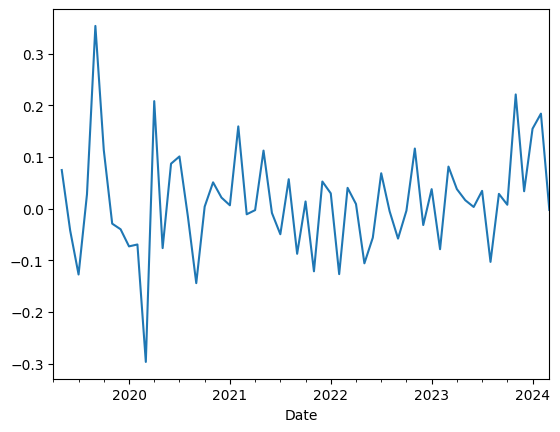

In [ ]:
# Plotting ONGC monthly returns
bpcl['BPCL Monthly returns'].plot()

<Axes: xlabel='Date'>

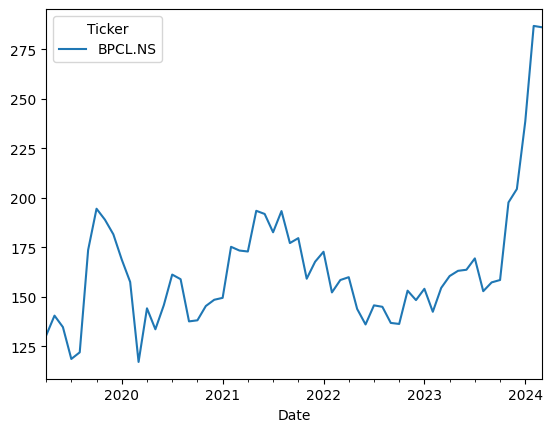

In [ ]:
# ploting ONGC closing prices
bpcl['Adj Close'].plot()

# Studying BPCL and Market data

In [ ]:
# merging market and BPCL returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    bpcl['BPCL Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,BPCL Monthly returns
Date,,
2019-05-01,0.014757,0.074794
2019-06-01,-0.011298,-0.042161
2019-07-01,-0.058589,-0.127417
2019-08-01,-0.008559,0.027829
2019-09-01,0.040116,0.353818


In [ ]:
# returns summary
returns.describe()

,Market returns,BPCL Monthly returns
count,59.000000,59.000000
mean,0.010883,0.013334
std,0.055823,0.102135
min,-0.264569,-0.296674
25%,-0.020723,-0.045823
50%,0.011765,0.007617
75%,0.039495,0.054805
max,0.136976,0.353818


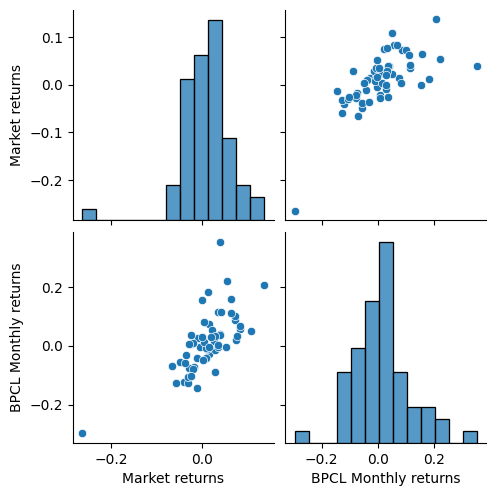

In [ ]:
sns.pairplot(returns)
plt.show()

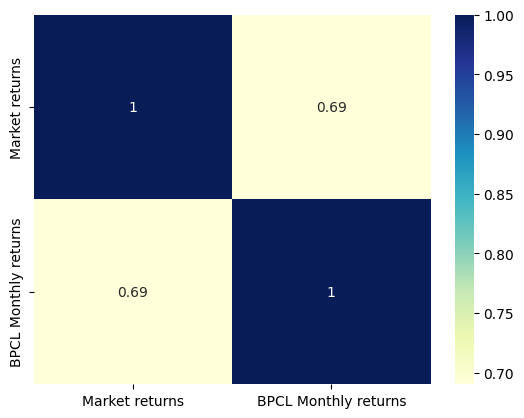

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()
#hi

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:

y_bpcl = bpcl['BPCL Monthly returns'].dropna()
len(X), len(y_bpcl)

(59, 59)

In [ ]:
# Regression - Market model, of ONGC
X = sm.add_constant(X)
Model_bpcl = sm.OLS(y_bpcl, X).fit()
print(Model_bpcl.summary())

                             OLS Regression Results                             
Dep. Variable:     BPCL Monthly returns   R-squared:                       0.477
Model:                              OLS   Adj. R-squared:                  0.467
Method:                   Least Squares   F-statistic:                     51.89
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):           1.46e-09
Time:                          03:23:14   Log-Likelihood:                 70.487
No. Observations:                    59   AIC:                            -137.0
Df Residuals:                        57   BIC:                            -132.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.000

Beta for BPCL 1.2620



<Axes: xlabel='Market returns', ylabel='BPCL Monthly returns'>

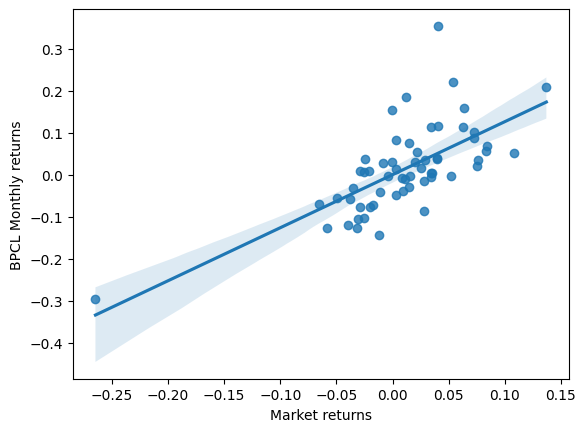

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='BPCL Monthly returns',
    data=returns
)

In [ ]:
print('resid', Model_bpcl.resid)

resid Date
2019-05-01    0.056567
2019-06-01   -0.027481
2019-07-01   -0.053010
2019-08-01    0.039049
2019-09-01    0.303563
2019-10-01    0.070310
2019-11-01   -0.047435
2019-12-01   -0.051191
2020-01-01   -0.050978
2020-02-01    0.014041
2020-03-01    0.037880
2020-04-01    0.035638
2020-05-01   -0.039613
2020-06-01   -0.004222
2020-07-01    0.010348
2020-08-01   -0.049515
2020-09-01   -0.128139
2020-10-01   -0.039208
2020-11-01   -0.084859
2020-12-01   -0.073075
2021-01-01    0.038703
2021-02-01    0.079467
2021-03-01   -0.024428
2021-04-01    0.002767
2021-05-01    0.033268
2021-06-01   -0.019078
2021-07-01   -0.052407
2021-08-01   -0.047744
2021-09-01   -0.122263
2021-10-01    0.010538
2021-11-01   -0.070663
2021-12-01    0.025699
2022-01-01    0.031095
2022-02-01   -0.085886
2022-03-01   -0.008722
2022-04-01    0.035882
2022-05-01   -0.066535
2022-06-01    0.007083
2022-07-01   -0.036721
2022-08-01   -0.048082
2022-09-01   -0.009290
2022-10-01   -0.069424
2022-11-01    0.065594


<ipython-input-41-6473b36758b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_bpcl.resid)


,0
count,5.900000e+01
mean,1.411300e-17
std,7.389690e-02
min,-1.281385e-01
25%,-5.024665e-02
50%,-9.290277e-03
75%,3.576036e-02
max,3.035629e-01


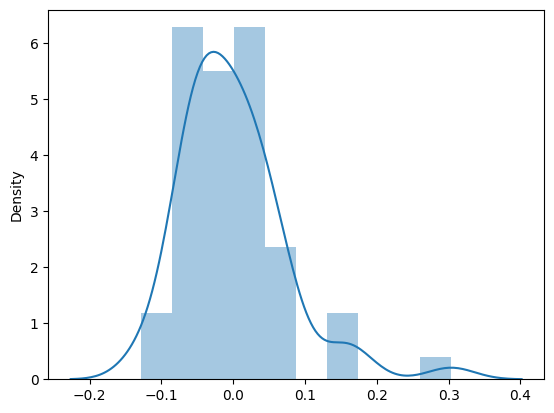

In [ ]:
# Histogram of residuals
sns.distplot(Model_bpcl.resid)
Model_bpcl.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(Model_bpcl.resid, Model_bpcl.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(0.509725461200612), 'Test Statistic p-value': np.float64(0.7750228775847355), 'F-Statistic': np.float64(0.2440117271829447), 'F-Test p-value': np.float64(0.7843071053863131)}


Homoskedasticity Holds Here


# Checking for Normality

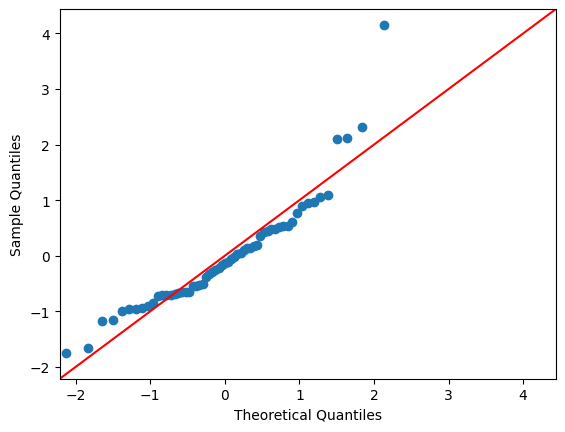

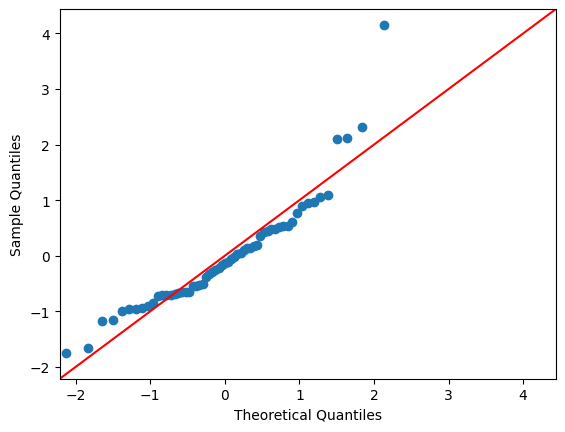

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    Model_bpcl.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

The line is straight but quite a few points lie outside

In [ ]:
stats.normaltest(Model_bpcl.resid)

NormaltestResult(statistic=np.float64(27.477152731954426), pvalue=np.float64(1.0799710033082761e-06))

In [ ]:
#beta of BPCL
beta_bpcl = Model_bpcl.params['Market returns']
beta_bpcl

np.float64(1.2629724142298895)

### GAIL

In [ ]:
# downloading GAIL data
gail = yf.download(
    'GAIL.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
gail.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS
Date,,,,,,
2019-04-01,90.188698,118.650002,121.616669,110.566666,117.333336,235484289
2019-05-01,91.468246,120.333336,121.033333,108.900002,118.650002,267956913
2019-06-01,79.040207,103.983330,121.800003,100.866669,120.966667,363930105
2019-07-01,65.294640,85.900002,104.916664,85.533333,103.316666,261061373
2019-08-01,65.776047,86.533333,89.066666,79.666664,85.900002,299624316


In [ ]:
# Calculate log returns
gail['GAIL Monthly returns'] = np.log(
    gail['Adj Close'] / gail['Adj Close'].shift(1))
gail.head()

Price,Adj Close,Close,High,Low,Open,Volume,GAIL Monthly returns
Ticker,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS,GAIL.NS,
Date,,,,,,,
2019-04-01,90.188698,118.650002,121.616669,110.566666,117.333336,235484289,NaN
2019-05-01,91.468246,120.333336,121.033333,108.900002,118.650002,267956913,0.014088
2019-06-01,79.040207,103.983330,121.800003,100.866669,120.966667,363930105,-0.146035
2019-07-01,65.294640,85.900002,104.916664,85.533333,103.316666,261061373,-0.191047
2019-08-01,65.776047,86.533333,89.066666,79.666664,85.900002,299624316,0.007346


<Axes: xlabel='Date'>

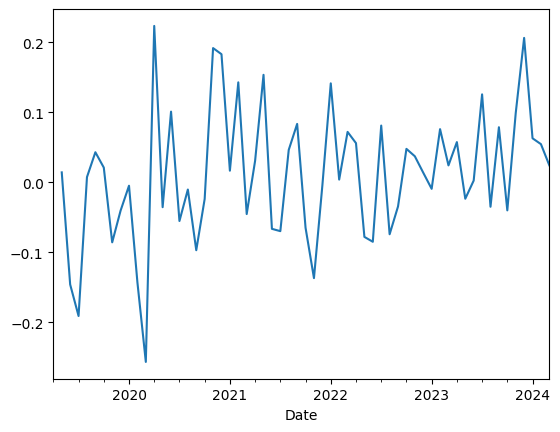

In [ ]:
# Plotting GAIL monthly returns
gail['GAIL Monthly returns'].plot()

<Axes: xlabel='Date'>

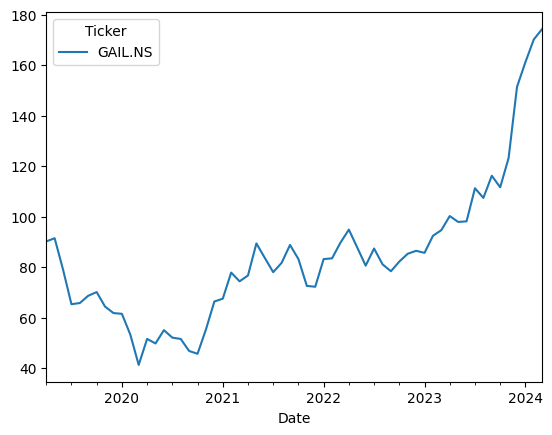

In [ ]:
# ploting GAIL closing prices
gail['Adj Close'].plot()





# Studying GAIL and Market data

In [ ]:
# merging market and GAIL returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    gail['GAIL Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,GAIL Monthly returns
Date,,
2019-05-01,0.014757,0.014088
2019-06-01,-0.011298,-0.146035
2019-07-01,-0.058589,-0.191047
2019-08-01,-0.008559,0.007346
2019-09-01,0.040116,0.042868


In [ ]:
# returns summary
returns.describe()

,Market returns,GAIL Monthly returns
count,59.000000,59.000000
mean,0.010883,0.011182
std,0.055823,0.096042
min,-0.264569,-0.256649
25%,-0.020723,-0.042960
50%,0.011765,0.013627
75%,0.039495,0.067337
max,0.136976,0.223274


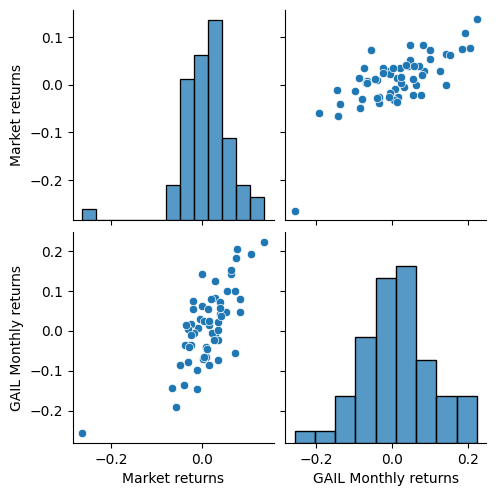

In [ ]:
sns.pairplot(returns)
plt.show()

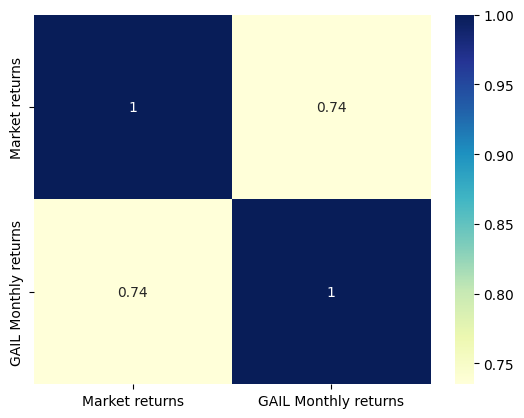

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()
#hi

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
y_gail = gail['GAIL Monthly returns'].dropna()
len(X), len(y_bpcl)

(59, 59)

In [ ]:
# Regression - Market model, of GAIL
X = sm.add_constant(X)
Model_gail = sm.OLS(y_gail, X).fit()
print(Model_gail.summary())

                             OLS Regression Results                             
Dep. Variable:     GAIL Monthly returns   R-squared:                       0.540
Model:                              OLS   Adj. R-squared:                  0.532
Method:                   Least Squares   F-statistic:                     67.01
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):           3.38e-11
Time:                          03:23:17   Log-Likelihood:                 77.953
No. Observations:                    59   AIC:                            -151.9
Df Residuals:                        57   BIC:                            -147.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.002

Beta for GAIL 1.2647

<Axes: xlabel='Market returns', ylabel='GAIL Monthly returns'>

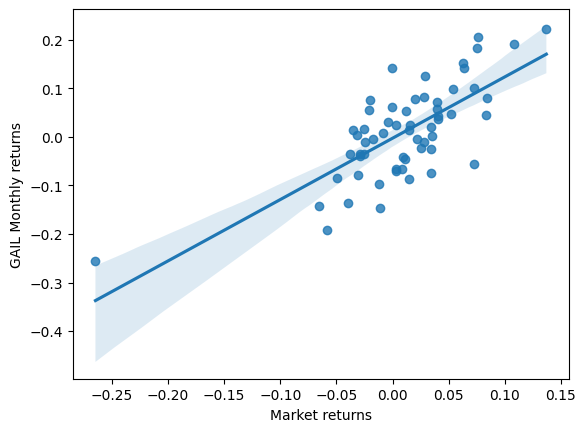

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='GAIL Monthly returns',
    data=returns
)

In [ ]:
print('resid', Model_gail.resid)

resid Date
2019-05-01   -0.001994
2019-06-01   -0.129165
2019-07-01   -0.114368
2019-08-01    0.020751
2019-09-01   -0.005286
2019-10-01   -0.020107
2019-11-01   -0.102148
2019-12-01   -0.049630
2020-01-01    0.019243
2020-02-01   -0.057367
2020-03-01    0.080534
2020-04-01    0.052623
2020-05-01    0.003331
2020-06-01    0.011572
2020-07-01   -0.144079
2020-08-01   -0.043188
2020-09-01   -0.078868
2020-10-01   -0.064956
2020-11-01    0.057734
2020-12-01    0.090372
2021-01-01    0.050875
2021-02-01    0.064904
2021-03-01   -0.056849
2021-04-01    0.038406
2021-05-01    0.076304
2021-06-01   -0.075188
2021-07-01   -0.070633
2021-08-01   -0.056546
2021-09-01    0.050534
2021-10-01   -0.066274
2021-11-01   -0.084107
2021-12-01   -0.029371
2022-01-01    0.144862
2022-02-01    0.046845
2022-03-01    0.024956
2022-04-01    0.084928
2022-05-01   -0.036576
2022-06-01   -0.019584
2022-07-01   -0.022347
2022-08-01   -0.115280
2022-09-01    0.016247
2022-10-01   -0.015896
2022-11-01   -0.011661


<ipython-input-60-eb0d60ab69bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_gail.resid)


,0
count,5.900000e+01
mean,1.358377e-17
std,6.511350e-02
min,-1.440794e-01
25%,-5.153286e-02
50%,3.330726e-03
75%,5.070480e-02
max,1.448622e-01


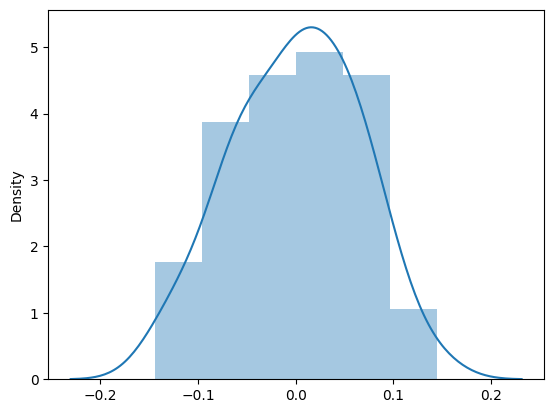

In [ ]:
# Histogram of residuals
sns.distplot(Model_gail.resid)
Model_gail.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(Model_gail.resid, Model_gail.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(0.31286639489732027), 'Test Statistic p-value': np.float64(0.8551886445781127), 'F-Statistic': np.float64(0.1492705218161012), 'F-Test p-value': np.float64(0.8616776423917385)}


Homoskedasticity Holds Here


# Checking for Normality

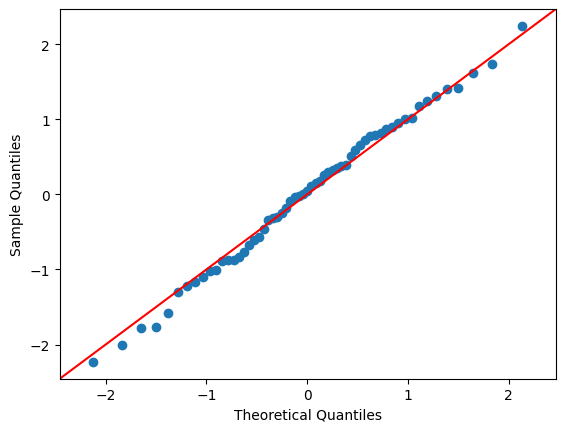

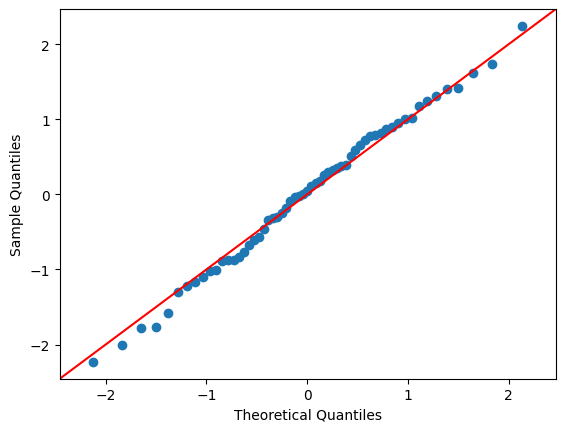

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    Model_gail.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

The line is sufficiently straight

In [ ]:
stats.normaltest(Model_gail.resid)

NormaltestResult(statistic=np.float64(1.0350806813059998), pvalue=np.float64(0.5959846658704822))

In [ ]:
#beta of GAIL
beta_gail = Model_gail.params['Market returns']
beta_gail

np.float64(1.2647017735228934)

### Indian Oil

In [ ]:
# downloading Indian Oil data
ioc = yf.download(
    'IOC.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
ioc.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IOC.NS,IOC.NS,IOC.NS,IOC.NS,IOC.NS,IOC.NS
Date,,,,,,
2019-04-01,70.536880,105.366669,109.199997,97.900002,108.733330,366710289
2019-05-01,73.884094,110.366669,112.533333,94.333336,105.366669,389968675
2019-06-01,69.577347,103.933334,113.833336,100.533333,111.866669,221585626
2019-07-01,62.168854,92.866669,105.000000,88.000000,103.933334,664817710
2019-08-01,54.648788,81.633331,94.599998,77.500000,91.966667,366451395


In [ ]:
# Calculate log returns
ioc['IOC Monthly returns'] = np.log(
    ioc['Adj Close'] / ioc['Adj Close'].shift(1))
ioc.head()

Price,Adj Close,Close,High,Low,Open,Volume,IOC Monthly returns
Ticker,IOC.NS,IOC.NS,IOC.NS,IOC.NS,IOC.NS,IOC.NS,
Date,,,,,,,
2019-04-01,70.536880,105.366669,109.199997,97.900002,108.733330,366710289,NaN
2019-05-01,73.884094,110.366669,112.533333,94.333336,105.366669,389968675,0.046362
2019-06-01,69.577347,103.933334,113.833336,100.533333,111.866669,221585626,-0.060059
2019-07-01,62.168854,92.866669,105.000000,88.000000,103.933334,664817710,-0.112585
2019-08-01,54.648788,81.633331,94.599998,77.500000,91.966667,366451395,-0.128927


<Axes: xlabel='Date'>

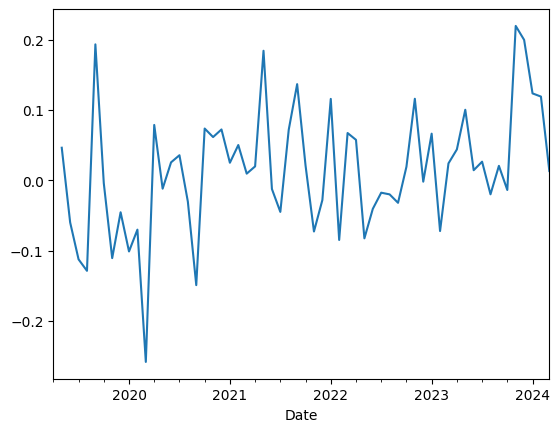

In [ ]:
# Plotting Indian Oil monthly returns
ioc['IOC Monthly returns'].plot()

<Axes: xlabel='Date'>

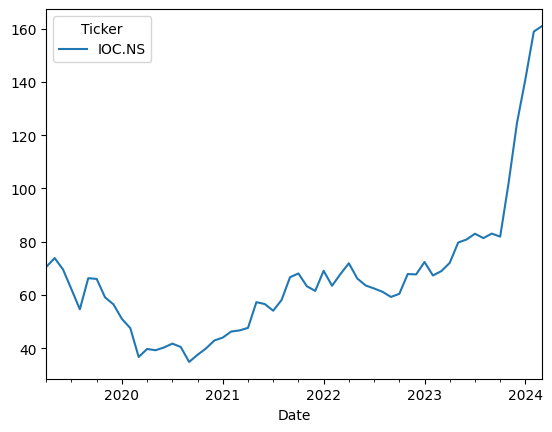

In [ ]:
# ploting Ibdian Oil closing prices
ioc['Adj Close'].plot()








# Studying Indian Oil and Market data

In [ ]:
# merging market and GAIL returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    ioc['IOC Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,IOC Monthly returns
Date,,
2019-05-01,0.014757,0.046362
2019-06-01,-0.011298,-0.060059
2019-07-01,-0.058589,-0.112585
2019-08-01,-0.008559,-0.128927
2019-09-01,0.040116,0.193531


In [ ]:
# returns summary
returns.describe()

,Market returns,IOC Monthly returns
count,59.000000,59.000000
mean,0.010883,0.013990
std,0.055823,0.089861
min,-0.264569,-0.258636
25%,-0.020723,-0.036388
50%,0.011765,0.019232
75%,0.039495,0.066832
max,0.136976,0.219794


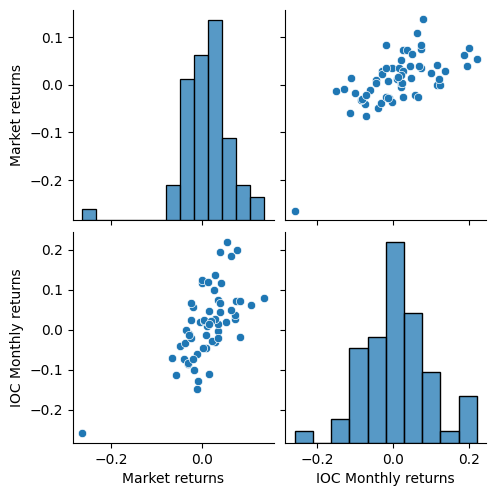

In [ ]:
sns.pairplot(returns)
plt.show()

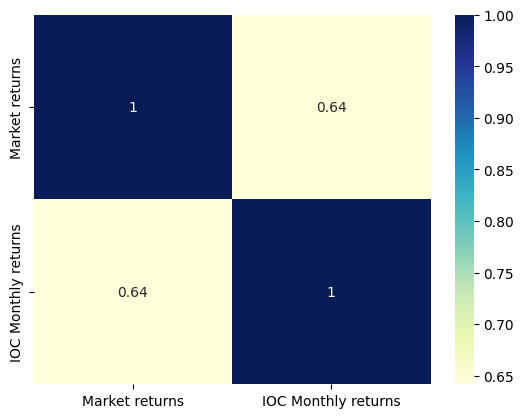

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()
#hi

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
y_ioc = ioc['IOC Monthly returns'].dropna()
len(X), len(y_ioc)

(59, 59)

In [ ]:
# Regression - Market model, of IOC
X = sm.add_constant(X)
Model_ioc = sm.OLS(y_ioc, X).fit()
print(Model_ioc.summary())

                             OLS Regression Results                            
Dep. Variable:     IOC Monthly returns   R-squared:                       0.412
Model:                             OLS   Adj. R-squared:                  0.401
Method:                  Least Squares   F-statistic:                     39.89
Date:                 Tue, 15 Apr 2025   Prob (F-statistic):           4.34e-08
Time:                         03:23:20   Log-Likelihood:                 74.598
No. Observations:                   59   AIC:                            -145.2
Df Residuals:                       57   BIC:                            -141.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0027      0.0

Beta for Indian Oil 1.0329

<Axes: xlabel='Market returns', ylabel='IOC Monthly returns'>

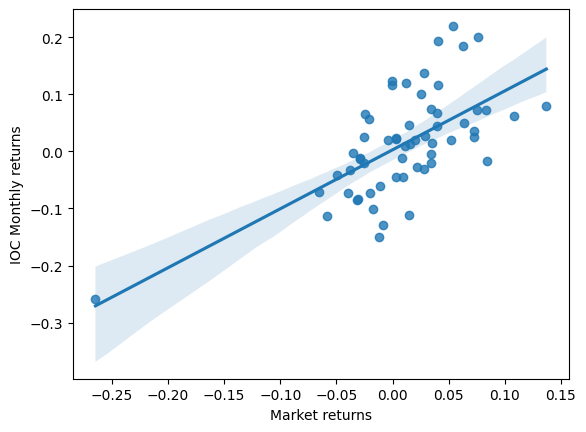

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='IOC Monthly returns',
    data=returns
)

In [ ]:
print('resid', Model_ioc.resid)

resid Date
2019-05-01    0.028371
2019-06-01   -0.051137
2019-07-01   -0.054817
2019-08-01   -0.122835
2019-09-01    0.149347
2019-10-01   -0.042482
2019-11-01   -0.128990
2019-12-01   -0.057876
2020-01-01   -0.086424
2020-02-01   -0.005199
2020-03-01    0.011891
2020-04-01   -0.065433
2020-05-01    0.015018
2020-06-01   -0.052264
2020-07-01   -0.041650
2020-08-01   -0.062053
2020-09-01   -0.139282
2020-10-01    0.035286
2020-11-01   -0.052655
2020-12-01   -0.008042
2021-01-01    0.048195
2021-02-01   -0.018192
2021-03-01   -0.004717
2021-04-01    0.021228
2021-05-01    0.116589
2021-06-01   -0.024336
2021-07-01   -0.050496
2021-08-01   -0.016786
2021-09-01    0.105242
2021-10-01    0.015048
2021-11-01   -0.034640
2021-12-01   -0.053226
2022-01-01    0.113985
2022-02-01   -0.054684
2022-03-01    0.024083
2022-04-01    0.076477
2022-05-01   -0.053672
2022-06-01    0.007912
2022-07-01   -0.106887
2022-08-01   -0.058388
2022-09-01    0.004581
2022-10-01   -0.037539
2022-11-01    0.071398


<ipython-input-79-bb6edfe28197>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_ioc.resid)


,0
count,5.900000e+01
mean,1.508327e-17
std,6.892267e-02
min,-1.392820e-01
25%,-5.245957e-02
50%,-5.198645e-03
75%,3.013199e-02
max,1.615285e-01


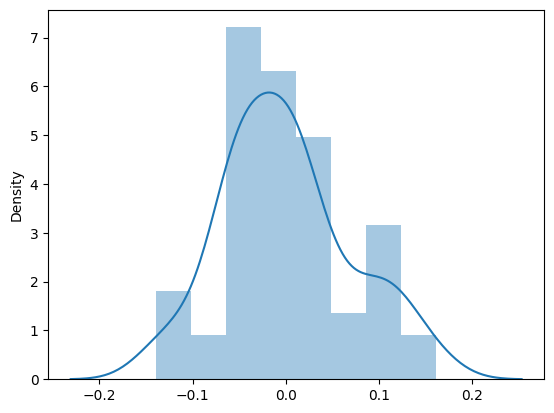

In [ ]:
# Histogram of residuals
sns.distplot(Model_ioc.resid)
Model_ioc.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(Model_ioc.resid, Model_ioc.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(1.836725845779846), 'Test Statistic p-value': np.float64(0.39917198179592533), 'F-Statistic': np.float64(0.8996742129061358), 'F-Test p-value': np.float64(0.4124984894493917)}


Homoskedasticity Holds Here


# Checking for Normality

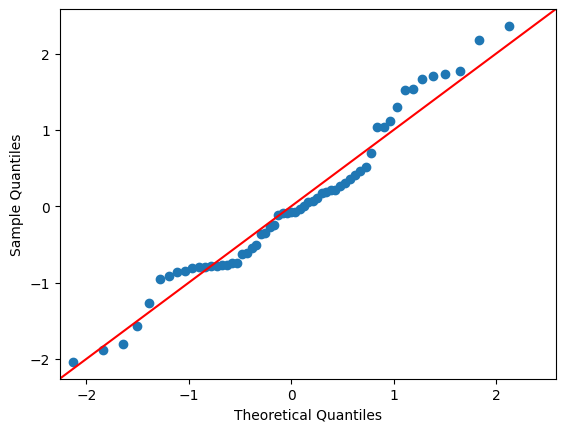

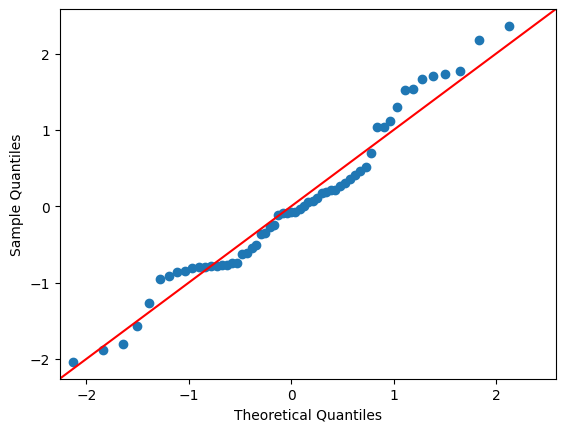

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    Model_ioc.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

The line is not straight


In [ ]:
stats.normaltest(Model_ioc.resid)

NormaltestResult(statistic=np.float64(1.7416516934370023), pvalue=np.float64(0.418605702313416))

In [ ]:
#beta of IOC
beta_ioc = Model_ioc.params['Market returns']
beta_ioc

np.float64(1.0329044277053767)

Oil India

In [ ]:
# downloading Oil India data
oi = yf.download(
    'OIL.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
oi.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,OIL.NS,OIL.NS,OIL.NS,OIL.NS,OIL.NS,OIL.NS
Date,,,,,,
2019-04-01,86.035583,120.566666,124.166664,116.033333,123.599998,36771278
2019-05-01,85.631203,120.000000,126.466667,114.666664,120.566666,60087649
2019-06-01,84.679749,118.666664,123.966667,114.233330,119.766663,27407864
2019-07-01,75.878761,106.333336,119.933334,101.000000,118.699997,63784915
2019-08-01,70.384094,98.633331,106.966667,93.099998,105.133331,40821482


In [ ]:
# Calculate log returns
oi['OI Monthly returns'] = np.log(
    oi['Adj Close'] / oi['Adj Close'].shift(1))
oi.head()

Price,Adj Close,Close,High,Low,Open,Volume,OI Monthly returns
Ticker,OIL.NS,OIL.NS,OIL.NS,OIL.NS,OIL.NS,OIL.NS,
Date,,,,,,,
2019-04-01,86.035583,120.566666,124.166664,116.033333,123.599998,36771278,NaN
2019-05-01,85.631203,120.000000,126.466667,114.666664,120.566666,60087649,-0.004711
2019-06-01,84.679749,118.666664,123.966667,114.233330,119.766663,27407864,-0.011173
2019-07-01,75.878761,106.333336,119.933334,101.000000,118.699997,63784915,-0.109740
2019-08-01,70.384094,98.633331,106.966667,93.099998,105.133331,40821482,-0.075170


<Axes: xlabel='Date'>

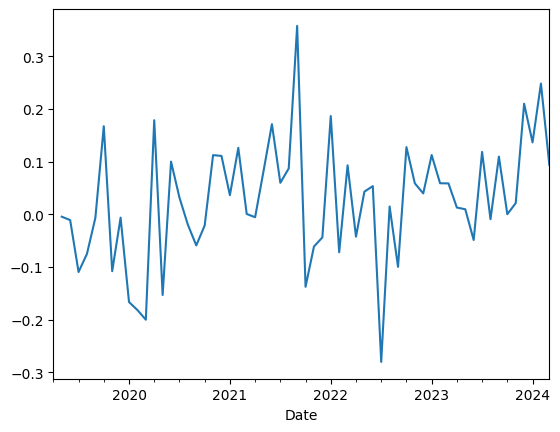

In [ ]:
# Plotting Oil India monthly returns
oi['OI Monthly returns'].plot()

<Axes: xlabel='Date'>

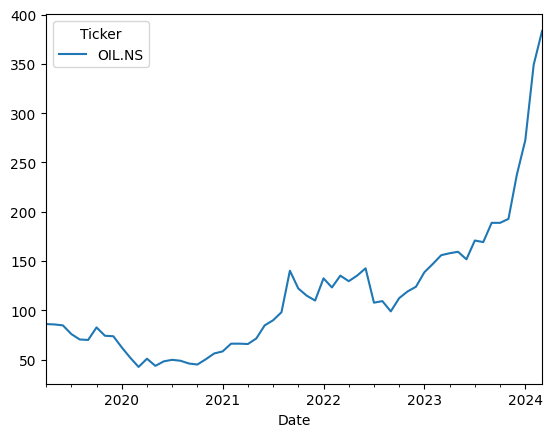

In [ ]:
# ploting Oil India closing prices
oi['Adj Close'].plot()

# Studying Oil India and Market data

In [ ]:
# merging market and GAIL returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    oi['OI Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,OI Monthly returns
Date,,
2019-05-01,0.014757,-0.004711
2019-06-01,-0.011298,-0.011173
2019-07-01,-0.058589,-0.109740
2019-08-01,-0.008559,-0.075170
2019-09-01,0.040116,-0.006788


In [ ]:
# returns summary
returns.describe()

,Market returns,OI Monthly returns
count,59.000000,59.000000
mean,0.010883,0.025326
std,0.055823,0.115931
min,-0.264569,-0.280419
25%,-0.020723,-0.043347
50%,0.011765,0.021025
75%,0.039495,0.104575
max,0.136976,0.357444


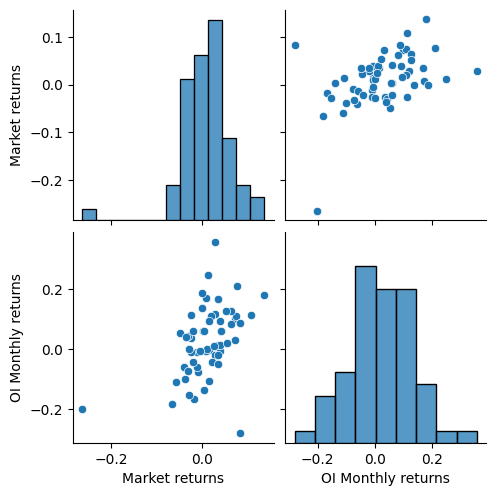

In [ ]:
sns.pairplot(returns)
plt.show()

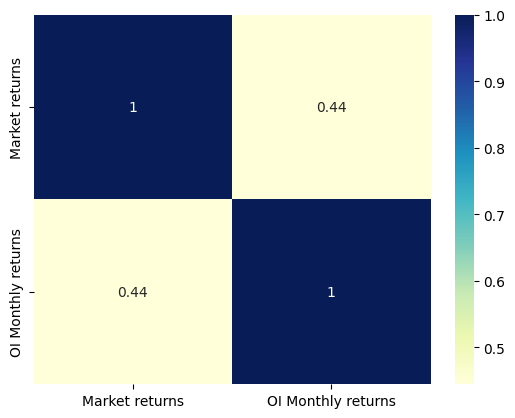

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()
#hi

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
y_oi = oi['OI Monthly returns'].dropna()
len(X), len(y_oi)

(59, 59)

In [ ]:
# Regression - Market model, of OI
X = sm.add_constant(X)
Model_oi = sm.OLS(y_oi, X).fit()
print(Model_oi.summary())

                            OLS Regression Results                            
Dep. Variable:     OI Monthly returns   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     14.02
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           0.000424
Time:                        03:23:23   Log-Likelihood:                 50.404
No. Observations:                  59   AIC:                            -96.81
Df Residuals:                      57   BIC:                            -92.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0153      0.014      1.

Beta for Oil India 0.9226

<Axes: xlabel='Market returns', ylabel='OI Monthly returns'>

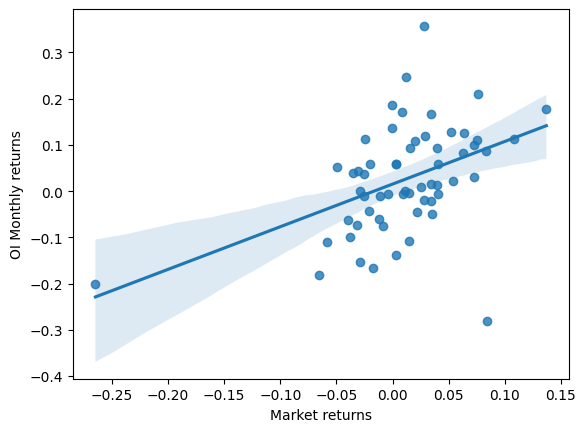

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='OI Monthly returns',
    data=returns
)

In [ ]:
print('resid', Model_oi.resid)

resid Date
2019-05-01   -0.033611
2019-06-01   -0.016034
2019-07-01   -0.070970
2019-08-01   -0.082558
2019-09-01   -0.059085
2019-10-01    0.119869
2019-11-01   -0.137235
2019-12-01   -0.030359
2020-01-01   -0.166203
2020-02-01   -0.136630
2020-03-01    0.028509
2020-04-01    0.036822
2020-05-01   -0.142136
2020-06-01    0.017556
2020-07-01   -0.050368
2020-08-01   -0.060941
2020-09-01   -0.063116
2020-10-01   -0.068661
2020-11-01   -0.002695
2020-12-01    0.025990
2021-01-01    0.044030
2021-02-01    0.052068
2021-03-01   -0.025028
2021-04-01   -0.017251
2021-05-01    0.008316
2021-06-01    0.147476
2021-07-01    0.041856
2021-08-01   -0.005219
2021-09-01    0.316354
2021-10-01   -0.155897
2021-11-01   -0.040012
2021-12-01   -0.079277
2022-01-01    0.171848
2022-02-01   -0.058001
2022-03-01    0.041427
2022-04-01   -0.038582
2022-05-01    0.055933
2022-06-01    0.083864
2022-07-01   -0.372945
2022-08-01   -0.032421
2022-09-01   -0.080092
2022-10-01    0.063775
2022-11-01    0.005877


<ipython-input-98-d6bfcd896377>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_oi.resid)


,0
count,5.900000e+01
mean,2.069907e-17
std,1.038619e-01
min,-3.729451e-01
25%,-5.854279e-02
50%,-2.695077e-03
75%,5.640566e-02
max,3.163536e-01


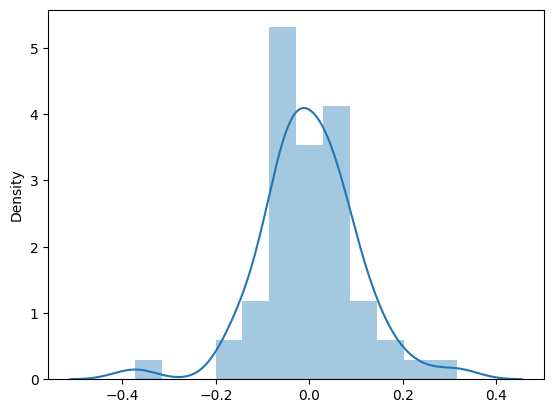

In [ ]:
# Histogram of residuals
sns.distplot(Model_oi.resid)
Model_oi.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(Model_oi.resid, Model_oi.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(0.7678558227290727), 'Test Statistic p-value': np.float64(0.6811805307845886), 'F-Statistic': np.float64(0.36921125505809277), 'F-Test p-value': np.float64(0.6929494590741025)}


Homoskedasticity Holds Here


# Checking for Normality

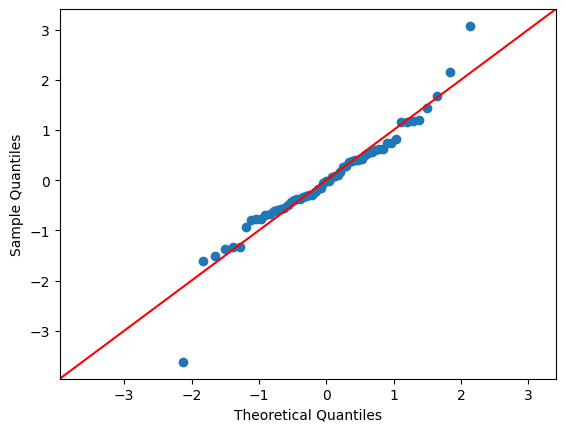

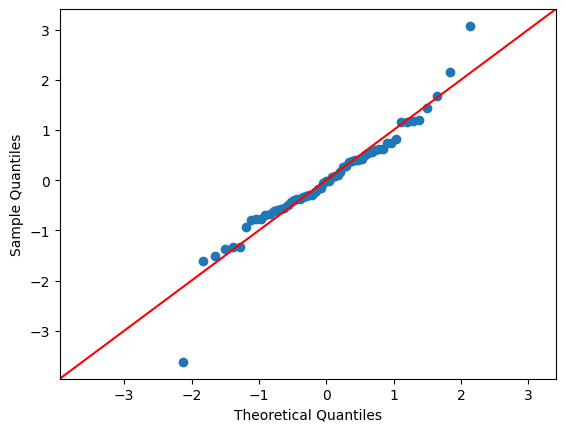

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    Model_oi.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

The line is almost straight

In [ ]:
stats.normaltest(Model_oi.resid)

NormaltestResult(statistic=np.float64(8.353640851154802), pvalue=np.float64(0.015347227723725671))

In [ ]:
#beta of OI
beta_oi = Model_oi.params['Market returns']
beta_oi

np.float64(0.9226132671910401)

HPCL

In [ ]:
# downloading HPCL data
hpcl = yf.download(
    'HINDPETRO.NS',
    start='2019-04-01',
    end='2024-04-01',
    progress=False,
    interval='1mo',
    auto_adjust=False
)
hpcl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS
Date,,,,,,
2019-04-01,149.167938,194.166672,196.566666,164.000000,189.333328,201703012
2019-05-01,166.069366,216.166672,221.333328,173.333328,194.166672,249749811
2019-06-01,148.553329,193.366669,222.333328,188.899994,222.199997,142305279
2019-07-01,140.413956,177.366669,200.833328,166.633331,193.000000,155189622
2019-08-01,137.300079,173.433334,179.466660,149.166672,176.333328,131171258


In [ ]:
# Calculate log returns
hpcl['HPCL Monthly returns'] = np.log(
    hpcl['Adj Close'] / hpcl['Adj Close'].shift(1))
hpcl.head()

Price,Adj Close,Close,High,Low,Open,Volume,HPCL Monthly returns
Ticker,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,
Date,,,,,,,
2019-04-01,149.167938,194.166672,196.566666,164.000000,189.333328,201703012,NaN
2019-05-01,166.069366,216.166672,221.333328,173.333328,194.166672,249749811,0.107333
2019-06-01,148.553329,193.366669,222.333328,188.899994,222.199997,142305279,-0.111462
2019-07-01,140.413956,177.366669,200.833328,166.633331,193.000000,155189622,-0.056349
2019-08-01,137.300079,173.433334,179.466660,149.166672,176.333328,131171258,-0.022426


<Axes: xlabel='Date'>

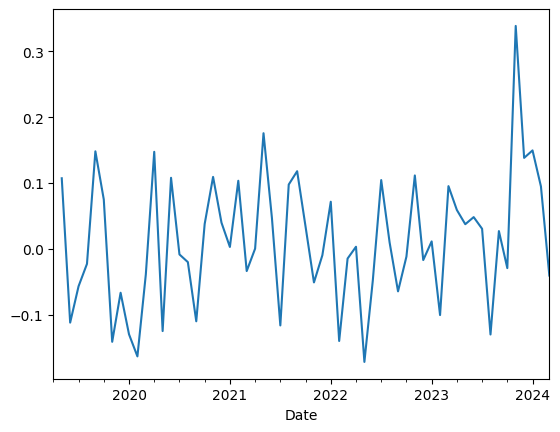

In [ ]:
# Plotting HPCL monthly returns
hpcl['HPCL Monthly returns'].plot()

<Axes: xlabel='Date'>

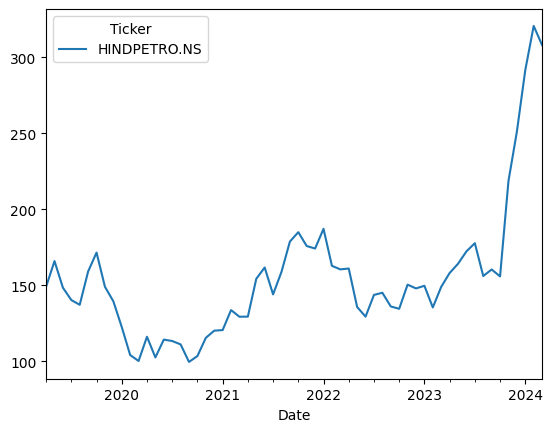

In [ ]:
# ploting HPCL closing prices
hpcl['Adj Close'].plot()

# Studying HPCL and Market data

In [ ]:
# merging market and BPCL returns into a single DataFrame
returns = pd.merge(
    nifty['Market returns'],
    hpcl['HPCL Monthly returns'],
    how='inner',
    on='Date'
).dropna(axis=0)
returns.head()

,Market returns,HPCL Monthly returns
Date,,
2019-05-01,0.014757,0.107333
2019-06-01,-0.011298,-0.111462
2019-07-01,-0.058589,-0.056349
2019-08-01,-0.008559,-0.022426
2019-09-01,0.040116,0.148175


In [ ]:
# returns summary
returns.describe()

,Market returns,HPCL Monthly returns
count,59.000000,59.000000
mean,0.010883,0.012296
std,0.055823,0.099454
min,-0.264569,-0.171064
25%,-0.020723,-0.049098
50%,0.011765,0.003521
75%,0.039495,0.095191
max,0.136976,0.338259


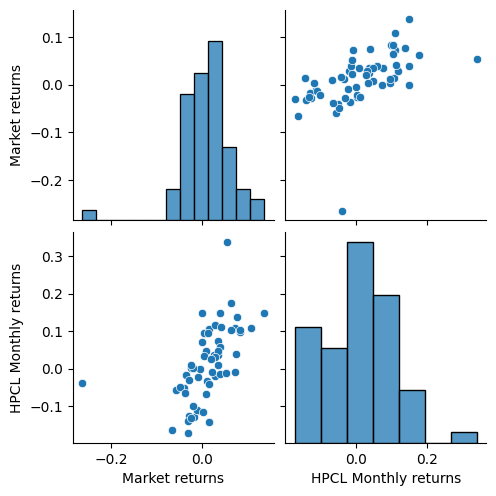

In [ ]:
sns.pairplot(returns)
plt.show()

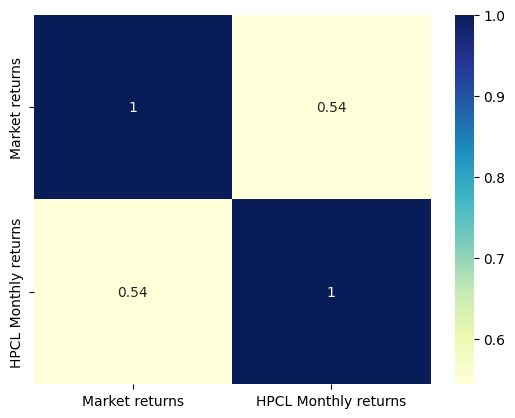

In [ ]:
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="YlGnBu"
)
plt.show()
#hi

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:

y_hpcl = hpcl['HPCL Monthly returns'].dropna()
len(X), len(y_hpcl)

(59, 59)

In [ ]:
# Regression - Market model, of HPCL
X = sm.add_constant(X)
Model_hpcl = sm.OLS(y_hpcl, X).fit()
print(Model_hpcl.summary())

                             OLS Regression Results                             
Dep. Variable:     HPCL Monthly returns   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.284
Method:                   Least Squares   F-statistic:                     24.00
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):           8.33e-06
Time:                          03:23:26   Log-Likelihood:                 63.329
No. Observations:                    59   AIC:                            -122.7
Df Residuals:                        57   BIC:                            -118.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.001

Beta for HPCL 0.9698

<Axes: xlabel='Market returns', ylabel='HPCL Monthly returns'>

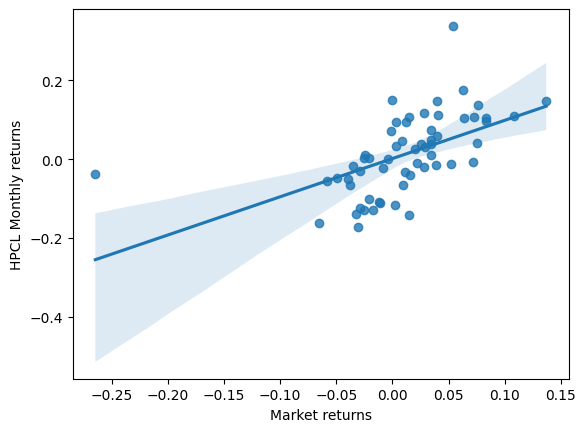

In [ ]:
# Regression - Security Characteristic line
sns.regplot(
    x='Market returns',
    y='HPCL Monthly returns',
    data=returns
)

In [ ]:
print('resid', Model_hpcl.resid)

resid Date
2019-05-01    0.091280
2019-06-01   -0.102247
2019-07-01   -0.001274
2019-08-01   -0.015868
2019-09-01    0.107529
2019-10-01    0.039944
2019-11-01   -0.156778
2019-12-01   -0.076933
2020-01-01   -0.114322
2020-02-01   -0.100738
2020-03-01    0.216387
2020-04-01    0.012863
2020-05-01   -0.098146
2020-06-01    0.035870
2020-07-01   -0.079868
2020-08-01   -0.048623
2020-09-01   -0.099226
2020-10-01    0.002815
2020-11-01    0.003045
2020-12-01   -0.034635
2021-01-01    0.025847
2021-02-01    0.040185
2021-03-01   -0.045806
2021-04-01    0.002840
2021-05-01    0.112767
2021-06-01    0.036802
2021-07-01   -0.120062
2021-08-01    0.015303
2021-09-01    0.089167
2021-10-01    0.029397
2021-11-01   -0.013754
2021-12-01   -0.032053
2022-01-01    0.070811
2022-02-01   -0.110042
2022-03-01   -0.054102
2022-04-01    0.022102
2022-05-01   -0.142980
2022-06-01   -0.001182
2022-07-01    0.021670
2022-08-01   -0.025228
2022-09-01   -0.028839
2022-10-01   -0.063854
2022-11-01    0.070502


<ipython-input-117-843d67252959>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Model_hpcl.resid)


,0
count,5.900000e+01
mean,8.703019e-18
std,8.342884e-02
min,-1.567776e-01
25%,-5.553154e-02
50%,2.839787e-03
75%,3.633601e-02
max,2.843934e-01


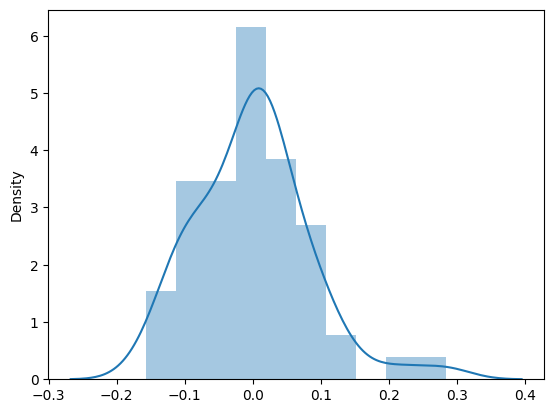

In [ ]:
# Histogram of residuals
sns.distplot(Model_hpcl.resid)
Model_hpcl.resid.describe()

# Checking For Homoskedasticity

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
# perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(Model_hpcl.resid, Model_hpcl.model.exog)

In [ ]:
# define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

In [ ]:
#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(8.83439266983428), 'Test Statistic p-value': np.float64(0.01206801958358232), 'F-Statistic': np.float64(4.9309279388832365), 'F-Test p-value': np.float64(0.010654026122420725)}


This is not homoskedastic

In [ ]:
# Fit OLS with HC3 robust standard errors
model = sm.OLS(y_hpcl, X).fit(cov_type='HC3')
print(model.summary())  # Output now shows robust SEs, t-stats, and p-values

                             OLS Regression Results                             
Dep. Variable:     HPCL Monthly returns   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.284
Method:                   Least Squares   F-statistic:                     2.629
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):              0.110
Time:                          03:23:27   Log-Likelihood:                 63.329
No. Observations:                    59   AIC:                            -122.7
Df Residuals:                        57   BIC:                            -118.5
Df Model:                             1                                         
Covariance Type:                    HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.001

Beta for HPCL 0.9698

# Checking for Normality

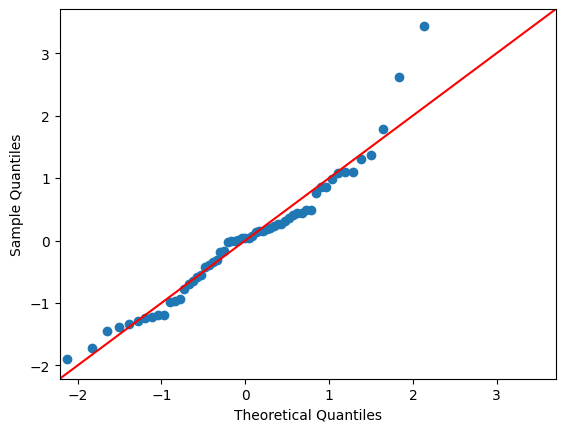

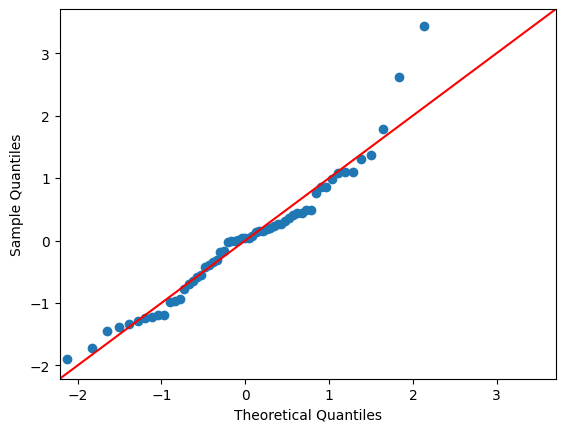

In [ ]:
# Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(
    Model_hpcl.resid,
    line='45',
    fit=True,
    dist=stats.norm
)

It is somewhat a straight line

In [ ]:
stats.normaltest(Model_hpcl.resid)

NormaltestResult(statistic=np.float64(9.426579400662558), pvalue=np.float64(0.008975203234682767))

In [ ]:
#beta of HPCL
beta_hpcl = Model_hpcl.params['Market returns']
beta_hpcl

np.float64(0.9697672467548651)